In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Function Part

### Perce
编写一个名为Perce的函数，用它来实现感知器算法。  
函数的输入/输出有：  
（a）一个N*d维的矩阵X，它的第i行是第i个数据向量；  
（b）一个N维列向量y，y的第i个元素包含了类（-1，1），并且该类与相应的向量相互对应；   
（c）用向量w_ini初始化参数向量；并且返回估计参数向量；
假设函数最大迭代**epc次数为10000。  


In [1]:
def Perce(X,y,w_ini,epoch=5,step=False,separable=True):
    leastWrong=len(y)

    totalMistake=len(y)
    wT=w_ini
    for t in range(epoch):
        wrong=0
        for i in range(len(y)):
            ynE=np.dot(wT,np.transpose(X[i]))
            if ynE*y[i]<0:
                wT1=wT+y[i]*X[i]
                if separable :
                    wrong+=1
                    # represent error, need to correct w
                    wT=wT1
                    if step:
                        yield wT,wrong
                else:
                    res=np.multiply(np.dot(wT1,np.transpose(X)),y) 
                    mistake=len(res[res<0])
                    if mistake<totalMistake:
                        wT=wT1
                        totalMistake=mistake
                        yield wT,mistake

        if separable and wrong<leastWrong:
            leastWrong=wrong
            print('wrong time: ',end='')
            print(wrong)
            print(wT)
            yield wT,wrong
            if wrong==0:
                break
    #return wT,wrong

### GenerateData
根据传入参数mu，d，N生成 **N** 个二维向量的数据集s0 和s1  
- 数据集s0 的样本来自均值向量 $m1=[mu,0]^{T}$ 的正态分布，并且协方差矩阵$S0=I$ 。
- 数据集s1 的样本来自均值向量 $m2=[-mu,0]^{T}$ 的正态分布，并且协方差矩阵$S1=I$ 。
其中 $I$是一个2*2的单位矩阵。


In [13]:
'''
sf
'''
def GenerateData(mu,d,N):
    I=np.eye(d)
    mu0=np.array([mu,0])
    mu1=np.array([-mu,0])

    s0=np.random.multivariate_normal(mu0,I,N)
    s1=np.random.multivariate_normal(mu1,I,N)
    X=np.zeros([2*N,d])
    X[:N]=s0
    X[N:]=s1
    y=np.zeros(2*N)
    y[:N]=1
    y[N:]=-1
    w=np.ones([d,1])
    wT=w.transpose()
    return X,y,wT

### DisplayWT
将感知器的分类面WT动态绘制在图像fig上

In [4]:
import pickle
from IPython.display import clear_output

In [5]:
def live_plot(X,y,result,epoch,clear=True,figsize=(7,5), title=''):
    """
    动态展示分界面的变换
    :param X:分类数据集
    :param y:分类标签 
    :param wT:初始分界向量（转置后形式[1,d]） 
    :param epoch:迭代次数（默认为5） 
    :param step:True时，在数据可分时每一次修改向量显示变化；否则不显示
    :param separable:True时，应用数据可分算法，否则应用不可分算法 
    :return:最终最小错误次数leastWrong及对应的分界向量recordWT，以及总迭代次数
    """
    wTr=result[0]
    error=result[1]
    if clear:
        clear_output(wait=True)
    plt.figure(figsize=figsize)
    
    plt.scatter(X[:,0],X[:,1],c=y.transpose(),marker = 'o', s=20, cmap = plt.cm.Spectral)
    scale=4
    plt.plot([-wTr[0][1]*scale,wTr[0][1]*scale],[-wTr[0][0]*scale,wTr[0][0]*scale],'-')
    
    plt.title(str(wTr))
    plt.grid(True)
    plt.xlabel('error'+str(error))
    plt.ylabel('epoch'+str(epoch))
    plt.show()

In [15]:
def DisplayWT(X,y,wT,epoch=5,step=False,separable=True):
    """
    动态展示分界面的变换
    :param X:分类数据集
    :param y:分类标签 
    :param wT:初始分界向量（转置后形式[1,d]） 
    :param epoch:迭代次数（默认为5） 
    :param step:True时，在数据可分时每一次修改向量显示变化；否则不显示
    :param separable:True时，应用数据可分算法，否则应用不可分算法 
    :return:最终最小错误次数leastWrong及对应的分界向量recordWT，以及总迭代次数
    """
    i=0
    leastWrong=len(y)
    recordWT=wT
    for result in Perce(X,y,wT,epoch,step,separable):
            i+=1
            wrong=result[1]
            if wrong<leastWrong:
                leastWrong=wrong
                recordWT=result[0]
            live_plot(X,y,result,i)
    return leastWrong,recordWT,i

## Test Part

### 均值向量为-5

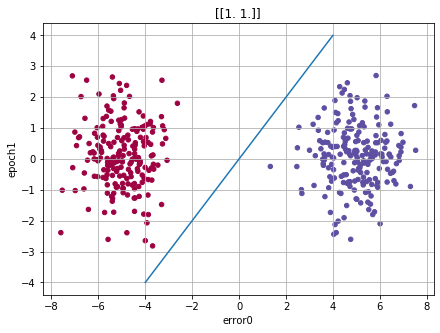

In [7]:
X,y,wT=GenerateData(5,2,200)
leastWrong,WT,i=DisplayWT(X,y,wT,10000,False)

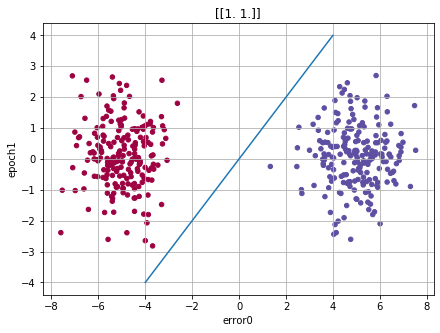

In [8]:
live_plot(X,y,(WT, leastWrong),i)

### 均值向量为2

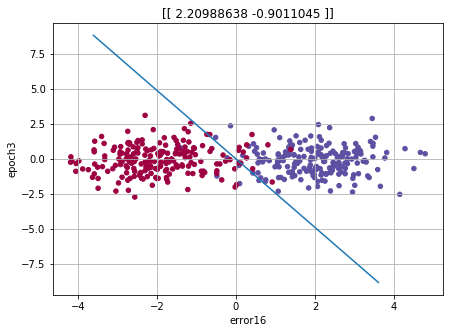

KeyboardInterrupt: 

In [10]:
X1,y1,wT1=GenerateData(2,2,200)
leastWrong,WT1,i=DisplayWT(X1,y1,wT1,10000,False,False)

In [11]:
live_plot(X1,y1,(WT1, leastWrong),i)

NameError: name 'WT1' is not defined

### 均值向量为1

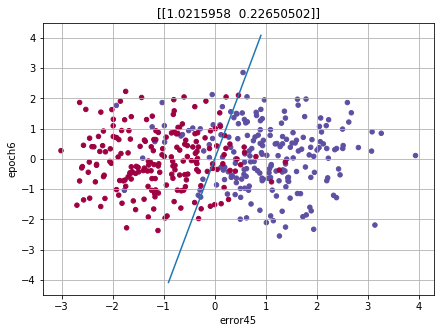

In [12]:
X2,y2,wT2=GenerateData(1,2,200)
leastWrong,WT2,i=DisplayWT(X2,y2,wT2,100,False,False)

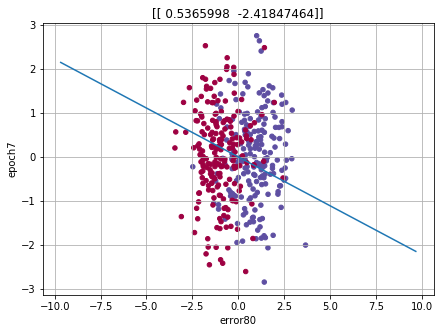

In [12]:
live_plot(X2,y2,(WT2, leastWrong),i)